In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

import warnings
warnings.filterwarnings('ignore')

# Libs para a rede neural
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

<ipython-input-1-6b01ea6ac21e>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [2]:
# Importando base de dados
Base_Dados = pd.read_csv('Cancer_Data.csv')
Base_Dados.shape

(569, 33)

In [3]:
# Verificando
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Verificando
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
Base_Dados['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
Base_Dados['diagnosis'].replace(  ['B', 'M'],[0, 1], inplace=True )
print(f'Classe 0 representa os cancer BENIGNO')
print(f'Classe 1 representa os cancer MALIGNO')

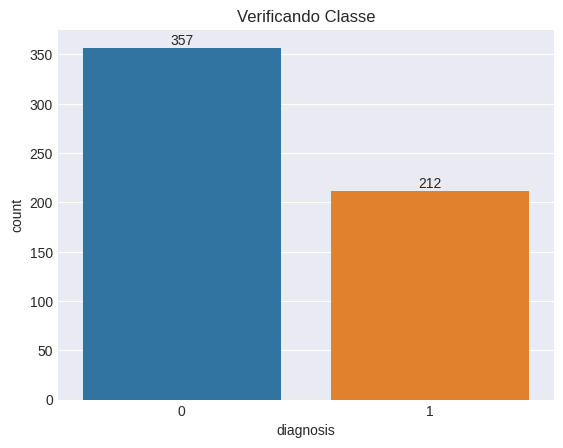

In [7]:
Eixo = sns.countplot( data=Base_Dados, x='diagnosis')
plt.title('Verificando Classe')
Eixo.bar_label( Eixo.containers[0], label_type='edge' );

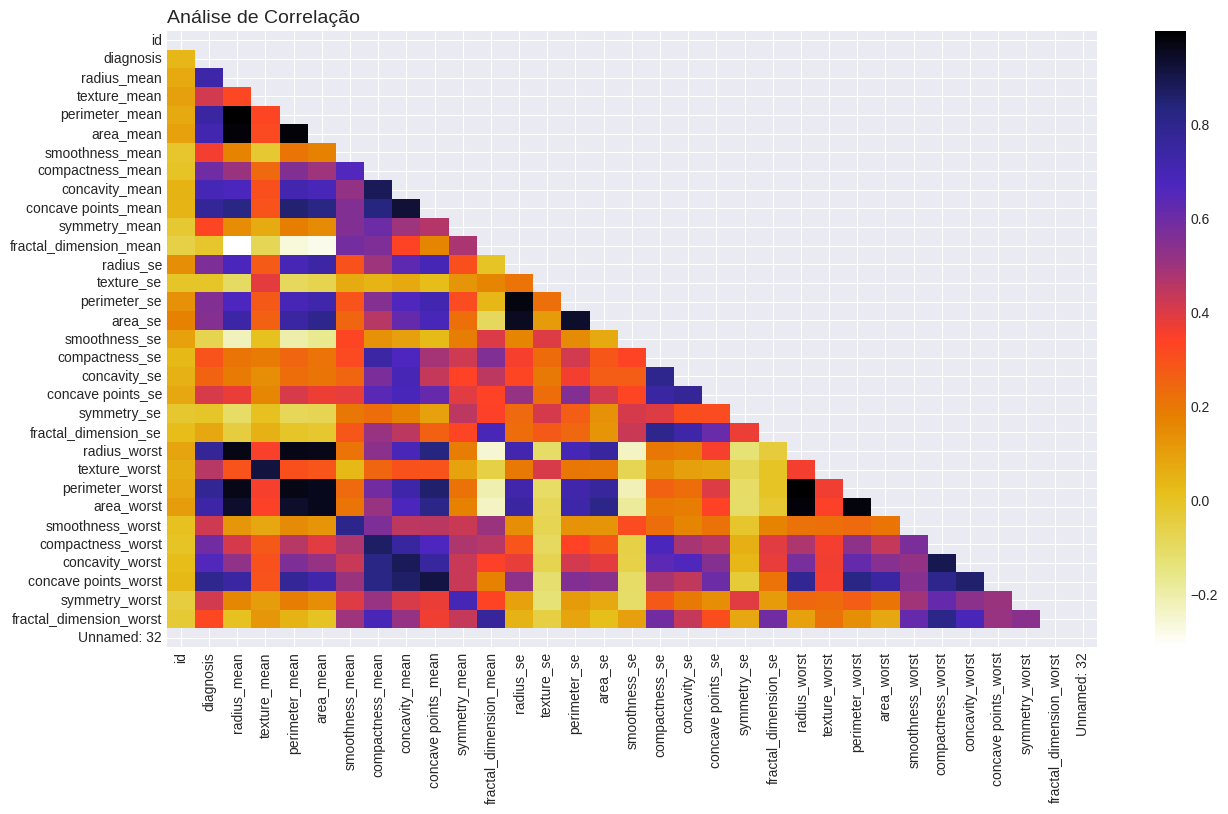

In [8]:
# Plot
Figura, Eixo = plt.subplots( figsize=(15, 8) )

# Calculando Coor
Correlacao = Base_Dados.corr()

# Gere uma máscara para o triângulo superior
mask = np.zeros_like( Correlacao )
mask[ np.triu_indices_from(mask) ] = True

# Titulo
plt.title('Análise de Correlação', loc='left', fontsize=14)

# Plot
sns.heatmap(
    Correlacao, 
    mask=mask, 
    cmap='CMRmap_r',
    annot=False,
    );

In [9]:
# Remover coluna ID
Base_Dados.drop( columns=['id', 'Unnamed: 32'], inplace=True )

In [10]:
# Definir 
Caracteristicas = Base_Dados.drop( columns='diagnosis')
Previsor = Base_Dados['diagnosis']

In [11]:
Caracteristicas.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
Previsor.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [13]:
# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    
    # Dados para a divisao
    Caracteristicas, 
    Previsor, 
    
    # Tamanho do teste
    test_size=0.2, 
    
    # Fixar as amostrar
    random_state=10 )

X_train.shape, X_test.shape

((455, 30), (114, 30))

In [14]:
# Treinar a rede neural
mlp = MLPClassifier(
    
    # uma tupla que define o número de neurônios em cada camada oculta da rede neural.
    hidden_layer_sizes=( 100 ),

    # a função de ativação usada nos neurônios da rede neural. Neste caso, a função ReLU.
    # {'identity', 'logistic', 'tanh', 'relu'}
    activation='tanh',

    # GRadiente
    # o otimizador usado para ajustar os pesos da rede neural durante o treinamento. Neste caso, o otimizador Adam.
    # {'lbfgs', 'sgd', 'adam'}
    # lbfgs --> é um otimizador da família de métodos quasi-Newton.
    # 'sgd' --> refere-se à descida do gradiente estocástico.
    # 'adam' --> refere-se a um otimizador baseado em gradiente estocástico
    solver='sgd',

    # o número máximo de iterações durante o treinamento da rede neural.
    max_iter=500,

    # Imprimir o log de treinamento
    verbose=True,

     # a taxa de aprendizagem inicial usada pelo otimizador durante o treinamento da rede neural.
    learning_rate_init=0.001, 

    # parâmetro de regularização L2 para evitar o overfitting da rede neural.
    alpha=0.0001,

)

mlp.fit( X_train, y_train )

Iteration 1, loss = 0.74550613
Iteration 2, loss = 0.62589330
Iteration 3, loss = 0.56594273
Iteration 4, loss = 0.52992881
Iteration 5, loss = 0.49624517
Iteration 6, loss = 0.46251068
Iteration 7, loss = 0.45107892
Iteration 8, loss = 0.45624031
Iteration 9, loss = 0.43947292
Iteration 10, loss = 0.44720714
Iteration 11, loss = 0.41844137
Iteration 12, loss = 0.42028261
Iteration 13, loss = 0.40263080
Iteration 14, loss = 0.40980874
Iteration 15, loss = 0.38512670
Iteration 16, loss = 0.39000668
Iteration 17, loss = 0.37868342
Iteration 18, loss = 0.41321975
Iteration 19, loss = 0.42647964
Iteration 20, loss = 0.36620127
Iteration 21, loss = 0.36916399
Iteration 22, loss = 0.35796921
Iteration 23, loss = 0.35024270
Iteration 24, loss = 0.36689606
Iteration 25, loss = 0.34092965
Iteration 26, loss = 0.33677998
Iteration 27, loss = 0.34458297
Iteration 28, loss = 0.35479460
Iteration 29, loss = 0.32942819
Iteration 30, loss = 0.32991764
Iteration 31, loss = 0.33663978
Iteration 32, los

MLPClassifier(activation='tanh', hidden_layer_sizes=100, max_iter=500,
              solver='sgd', verbose=True)

In [15]:
# Fazendo a predição dos dados de teste
y_pred = mlp.predict( X_test )

# Calculando a acurácia do modelo
acc = accuracy_score(y_test, y_pred)

print("Acurácia (Previsão):", acc)

#Default: 'Acurácia (Previsão): 0.9298245614035088'
# 3 camadas x 100 N 'Acurácia (Previsão): 0.9298245614035088'
# Acurácia (Previsão): 0.6578947368421053
# Acurácia (Previsão): 0.9210526315789473
# Acurácia (Previsão): 0.9298245614035088
# Acurácia (Previsão): 0.9473684210526315

Acurácia (Previsão): 0.9122807017543859


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# define a pipeline
pipeline = Pipeline([
    ( 'mlp', MLPClassifier() )
])

# define os parâmetros para serem testados
param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (150,), (200) ],
    'mlp__solver': ['lbfgs', 'sgd', 'adam'],
    'mlp__learning_rate_init': [0.001],
    'mlp__activation': ['relu', 'tanh', 'logistic', 'identity']
}

# executa a busca em grade
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, verbose=2 )
grid_search.fit(Caracteristicas , Previsor)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__solver=lbfgs; total time=   0.2s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__solver=lbfgs; total time=   0.0s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__solver=lbfgs; total time=   0.2s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__solver=lbfgs; total time=   0.2s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__solver=lbfgs; total time=   0.2s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__solver=sgd; total time=   0.2s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=

GridSearchCV(cv=5, estimator=Pipeline(steps=[('mlp', MLPClassifier())]),
             param_grid={'mlp__activation': ['relu', 'tanh', 'logistic',
                                             'identity'],
                         'mlp__hidden_layer_sizes': [(50,), (100,), (150,),
                                                     200],
                         'mlp__learning_rate_init': [0.001],
                         'mlp__solver': ['lbfgs', 'sgd', 'adam']},
             verbose=2)

In [17]:
grid_search.best_params_

{'mlp__activation': 'identity',
 'mlp__hidden_layer_sizes': 200,
 'mlp__learning_rate_init': 0.001,
 'mlp__solver': 'lbfgs'}

In [18]:
grid_search.best_score_

0.9525694767893185

In [19]:
grid_search.cv_results_

{'mean_fit_time': array([0.18492336, 0.12872205, 0.31725135, 0.41512132, 0.17329707,
        0.57281232, 0.3515224 , 0.15815935, 0.4127552 , 1.08576388,
        0.11217842, 0.54542789, 0.30909777, 0.14368277, 0.51799598,
        0.72768202, 0.11246896, 0.31214776, 0.52644858, 0.21511478,
        0.6802907 , 0.6764854 , 0.16291537, 0.47818823, 0.27121949,
        0.29771008, 0.4794795 , 0.44988689, 0.3724175 , 0.29748907,
        0.58246093, 0.43037724, 0.53937573, 0.76019754, 0.45289564,
        0.38525867, 0.08345165, 0.04940934, 0.4006464 , 0.12481518,
        0.04471941, 0.20686445, 0.27984157, 0.07339416, 0.18734078,
        0.40410619, 0.06210041, 0.19642429]),
 'std_fit_time': array([0.08185121, 0.07652286, 0.1621913 , 0.20406138, 0.23925799,
        0.18063975, 0.14901628, 0.1318395 , 0.128761  , 0.45290517,
        0.1535136 , 0.32399093, 0.15396888, 0.08096904, 0.21197404,
        0.19301785, 0.04974098, 0.13359431, 0.0298756 , 0.17078409,
        0.19343191, 0.06616142, 0.044

In [20]:
from sklearn.metrics import classification_report

# Fazer as previsões
y_pred = grid_search.predict(X_test)

# Calcular o relatório de classificação
print( classification_report( y_test, y_pred ) )

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        75
           1       0.88      0.95      0.91        39

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114

